# Algebraic Number Theory, Lecture 15
This notebook was created for the course on Algebraic Number Theory at Nagoya University in the Fall semester 2021/2022.

See https://www.henrikbachmann.com/algnt_2021.html for the lecture notes and infos on this course.

### Basics
Create the number field $K=\mathbb{Q}(i)$ and its ring of integers $\mathcal{O}_K=\mathbb{Z}[i]$ by using the minimal polynomial $x^2+1$ of $i$:

In [55]:
K.<y> = NumberField(x^2+1)
O = K.ring_of_integers()

Factor the ideal $(13)$ in $\mathbb{Z}[i]$:

In [6]:
I=O.ideal(13);
I.factor()

(Fractional ideal (-3*y - 2)) * (Fractional ideal (2*y + 3))

In [245]:
# Naive way of finding the representation of p as a sum of two squares
p=4001
for a in range(p):
    for b in range(1,a+1):
        if a^2+b^2==p:
            print(p," = ", a,"^2 + ",b,"^2")

4001  =  49 ^2 +  40 ^2


----
Factorizing $6$ in $\mathbb{Z}[\sqrt{-5}]$.

In [54]:
K.<y> = NumberField(x^2+5); O = K.ring_of_integers();
I=O.ideal(6)
I.factor()

(Fractional ideal (2, y + 1))^2 * (Fractional ideal (3, y + 1)) * (Fractional ideal (3, y + 2))

In [57]:
p1=O.ideal(2,y+1); p2=O.ideal(3,y+1); p3=O.ideal(3,y+2);
print("p1^2 = ",p1^2)
print("p2*p3 = ",p2*p3)
print("p1*p2 = ",p1*p2)
print("p1*p3 = ",p1*p3)

p1^2 =  Fractional ideal (2)
p2*p3 =  Fractional ideal (1)
p1*p2 =  Fractional ideal (y + 1)
p1*p3 =  Fractional ideal (y + 1)


---
### Trace and Norm


In [59]:
K.<y> = NumberField(x^2+1)
m=5+4*y
print("The element ", m , " has norm ", m.norm() ," and trace ", m.trace() )

The element  4*y + 5  has norm  41  and trace  10


Consider the polynomial $f(x)=x^4-2x^2+x+1$. This has two real roots and one pair of complex conjugates. We can plot the graph of it by using the following code:

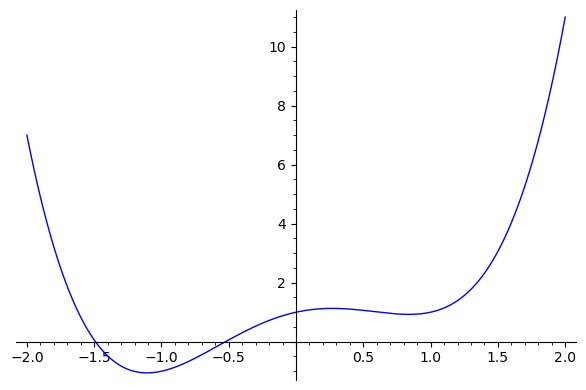

In [92]:
f(x)=x^4-2*x^2+x+1
plot(f(x),(x,-2,2))

The roots of $f$ can be calculated by f.roots():

In [119]:
f(x)=x^4-2*x^2+x+1
for r in f.roots():
    print(r[0].n())

-1.49021612009995
-0.524888598656405
1.00755235937818 - 0.513115795597015*I
1.00755235937818 + 0.513115795597015*I


Now consider the number field obtained by adjoining a root of $f$:

In [189]:
K.<y> = NumberField(f(x))
print("K is a",K,"\nThe degree is ", K.degree())
[r,s]=K.signature()
print("K has",r," real embeddings and ",s, "pair of complex embeddings")

K is a Number Field in y with defining polynomial x^4 - 2*x^2 + x + 1 
The degree is  4
K has 2  real embeddings and  1 pair of complex embeddings


In [104]:
# Using the built-in functions for norm and trace
a=y^2-3
print(a, " has norm ", a.norm(), " and trace ", a.trace())

y^2 - 3  has norm  13  and trace  -8


The trace and norm can be calculated by 
\begin{align*}
    \operatorname{Tr}_{L/K}(x) &= \sum_{i=1}^n \sigma_i(x)\,,\\
    \operatorname{N}_{L/K}(x) &= \prod_{i=1}^n \sigma_i(x)\,.
\end{align*}
where $\sigma_i : K \rightarrow \mathbb{C}$ runs through all embeddings of $K$. If $\theta_1,\dots,\theta_4$ are the roots of $f$, then $\sigma_i$ for an element $a=\sum_{j=0}^3 a_j y^j$ is given for $i=1,\dots,4$ by
\begin{align*}
\sigma_i: \sum_{j=0}^3 a_j y^j \mapsto \sum_{j=0}^3 a_j \theta_i^j
\end{align*}

In [188]:
# Calculating the norm&trace of y^2-3 by using the roots of the polynomial f
p(x)=x^2-3
norm=1
trace=0
for r in f.roots():
    norm*=p(r[0])
    trace+=p(r[0])
print(a, " has norm ", norm.n(), " and trace ", trace.n())

y^2 - 3  has norm  13.0000000000000  and trace  -8.00000000000000


Sage can also create all the $\mathbb{C}-$embeddings of K:

In [186]:
K.embeddings(CC)

[
Ring morphism:
  From: Number Field in y with defining polynomial x^3 - x^2 - 2*x - 8
  To:   Complex Field with 53 bits of precision
  Defn: y |--> -0.883672870430983 - 1.45257666464430*I,
Ring morphism:
  From: Number Field in y with defining polynomial x^3 - x^2 - 2*x - 8
  To:   Complex Field with 53 bits of precision
  Defn: y |--> -0.883672870430983 + 1.45257666464430*I,
Ring morphism:
  From: Number Field in y with defining polynomial x^3 - x^2 - 2*x - 8
  To:   Complex Field with 53 bits of precision
  Defn: y |--> 2.76734574086197
]

With this we can compute the norm and trace as follows:

In [193]:
# Calculating the norm&trace of y^2-3 by using the C-embeddings 
embeddings=K.embeddings(CC);
a=y^2-3
norm=1
trace=0
for e in embeddings:
    norm*=e(a)
    trace+=e(a)
print(a, " has norm ", norm.n(), " and trace ", trace.n())

y^2 - 3  has norm  13.0000000000000 + 8.88178419700125e-16*I  and trace  -8.00000000000000


---
### Discriminant

Let $\omega_1,\dots,\omega_w$ be an integral basis of $K$. Then the discriminant of $K$ is given by 
\begin{align*}
    d_K   = d(\omega_1,\dots,\omega_n) = \det( \sigma_i(\omega_j) )^2,
\end{align*}
where $\sigma_i$ run again through all embeddings of $K$. 

In [206]:
g(x)=x^3-x^2-2*x-8
K.<y> = NumberField(g(x))

print("K is a",K,"\nThe degree is ", K.degree())
[r,s]=K.signature()
print("K has",r," real embeddings and ",s, "pair of complex embeddings")

# Using the built in function for the discriminant & integral basis
print("discriminant: ", K.discriminant())
print("integral basis: ",K.integral_basis())

K is a Number Field in y with defining polynomial x^3 - x^2 - 2*x - 8 
The degree is  3
K has 1  real embeddings and  1 pair of complex embeddings
discriminant:  -503
integral basis:  [1, 1/2*y^2 + 1/2*y, y^2]


Calculating the discriminant by using the integral basis

In [244]:
# Calculating the discriminant by using an integral basis
B=K.integral_basis()
embeddings=K.embeddings(CC)
n=K.degree();
mat=matrix.zero(CC,n,n)

for i in range(n):
    for j in range(n):
        mat[i,j]=embeddings[i](B[j])
        
print(det(mat)^2)

-503.000000000000


---
### Class number & Analytic class number formula

Let $K=\mathbb{Q}(\sqrt{-5})$ then $\mathcal{O}_K=\mathbb{Z}[\sqrt{-5}]$. The class number is $h_K=2$ and we can compute the classes as follows:

In [255]:
K.<y> = NumberField(x^2+5)
CK = K.class_group();
print(CK)
print("generators: ",CK.gen())
print("class number: ",K.class_number())

Class group of order 2 with structure C2 of Number Field in y with defining polynomial x^2 + 5
generators:  Fractional ideal class (2, y + 1)
class number:  2


In [299]:
# Analytic class number formula
K.<y> = NumberField(x^2+5)
DZ = K.zeta_function()
[r,s]=K.signature()
RK=K.regulator()
wK=K.zeta_order()
dK=K.discriminant()
hK=K.class_number()
print("RHS:", 2^r*(2*pi.n())^s*hK*RK/(wK*sqrt(abs(dK.n()))))
print("LHS: ",(0.9999999-1)*DZ(0.9999999))

RHS: 1.40496294620815
LHS:  1.40496290972109


---
### Cyclotomic fields & regular primes


A prime $p$ is called regular if $p$ does not divide $h_{\mathbb{Q}(\zeta_p)}$

Recall the criteria of Kummer: A prime $p$ is regular if and only if it does not divide the numerator of the Bernoulli numbers $B_k$ for $k=2,4,\dots,p-3$.

In [204]:
# Cyclotomic field 
p=13
K.<p> = CyclotomicField(p);
print(K)

Cyclotomic Field of order 13 and degree 12


In [110]:
# List of Bernoulli numbers B_0,....,B_9
for k in range(10):
    print(bernoulli(k))

1
-1/2
1/6
0
-1/30
0
1/42
0
-1/30
0


In [200]:
# Check if a prime is regular by using the definition
 
p=23
K.<y> = CyclotomicField(p)
# the command %time measures the time it takes for a command to be executed
%time classnumber = K.class_number()

print("")
print("class number: ", classnumber)

if classnumber % p != 0:
        print(p, " is regular")
else:
        print(p, " is not regular")

CPU times: user 9 µs, sys: 1 µs, total: 10 µs
Wall time: 10 µs

class number:  3
23  is regular


In [68]:
# Using Kummer's criteria to check if a prime is regular 
p=37
regular=True
for k in range(2,p-2):
    if k % 2 ==0 and bernoulli(k).numerator() % p == 0:
        regular=False
        break

if regular:
        print(p, " is regular")
else:
        print(p, " is not regular")

37  is not regular


In [52]:
# Give all irregular primes up to a given bound

P = Primes()

for n in range(30):
    p = P.unrank(n)
    regular=True
    for k in range(2,p-2):
        if k % 2 ==0 and bernoulli(k).numerator() % p == 0:
            regular=False
            break

    if not regular:
        print(p, " is not regular")

37  is not regular
59  is not regular
67  is not regular
101  is not regular
103  is not regular


---
### Units 

In [331]:
K.<y> = NumberField(x^2-7)
UK = UnitGroup(K); 
print(UK);
print("generators: ", UK.gens_values())
zeta=UK.gens()[0]
eps1=UK.gens()[1]

Unit group with structure C2 x Z of Number Field in y with defining polynomial x^2 - 7
generators:  [-1, 3*y - 8]


In [330]:
K.<y> = NumberField(x^5-8*x^2+36)
UK = UnitGroup(K); 
print(UK);
print("generators: ", UK.gens_values())
zeta=UK.gens()[0]
eps1=UK.gens()[1]
eps2=UK.gens()[2]

Unit group with structure C2 x Z x Z of Number Field in y with defining polynomial x^5 - 8*x^2 + 36
generators:  [-1, 1/6*y^3 + 1/3*y^2 + 2/3*y + 1, 431/6*y^4 + 165/2*y^3 + 35*y^2 - 2384/3*y - 1525]


### Ramification 

In [358]:
# Calculate the ramification indices and inertia degrees
K.<y> = NumberField(x^2+1)
p=K.ideal(53)
fac=K.factor(p)
print("The ideals over ", p, " are:")
for P in fac:
    print(P[0], "with ramification index e =", P[1], " and inertia degree f =", P[0].residue_class_degree())

The ideals over  Fractional ideal (53)  are:
Fractional ideal (-2*y + 7) with ramification index e = 1  and inertia degree f = 1
Fractional ideal (2*y + 7) with ramification index e = 1  and inertia degree f = 1
